In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

<AxesSubplot:>

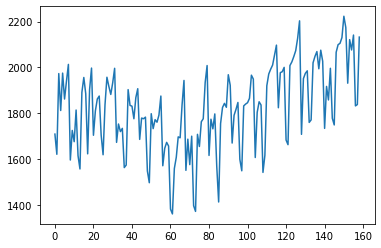

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

In [5]:
Walmart.sample(4)

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
13,Feb-92,1557,14,7.350516,196,0,1,0,0,0,0,0,0,0,0,0,0
69,Oct-96,1687,70,7.430707,4900,0,0,0,0,0,0,0,0,0,1,0,0
32,Sep-93,1673,33,7.422374,1089,0,0,0,0,0,0,0,0,1,0,0,0
158,Mar-04,2132,159,7.664816,25281,0,0,1,0,0,0,0,0,0,0,0,0


In [7]:
Walmart.shape

(159, 17)

In [14]:
Walmart["Footfalls"].rolling(3).mean()

0              NaN
1              NaN
2      1767.666667
3      1802.000000
4      1920.000000
          ...     
154    2042.666667
155    2112.666667
156    2016.333333
157    1937.000000
158    1934.000000
Name: Footfalls, Length: 159, dtype: float64

# Splitting data

In [27]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

# Moving Average 

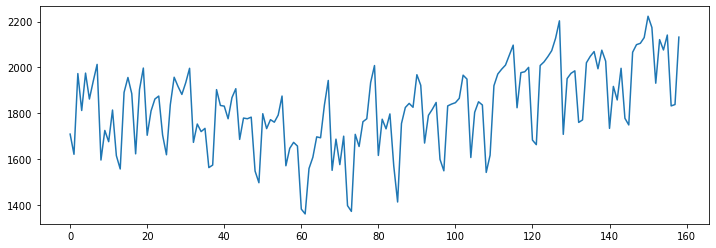

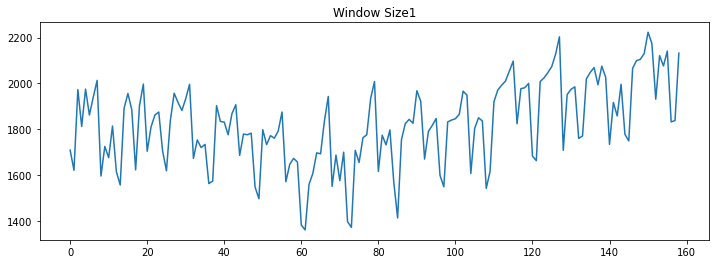

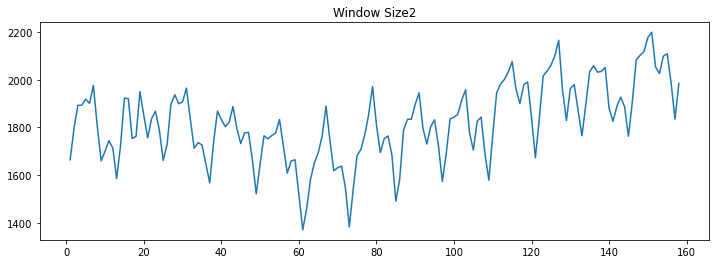

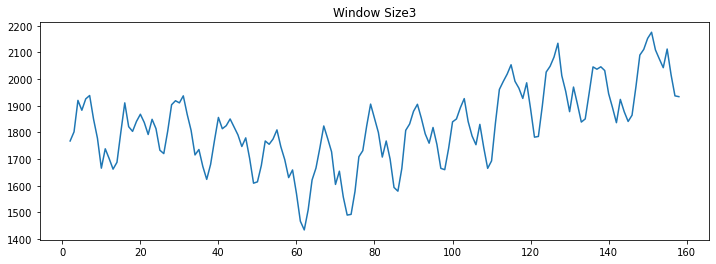

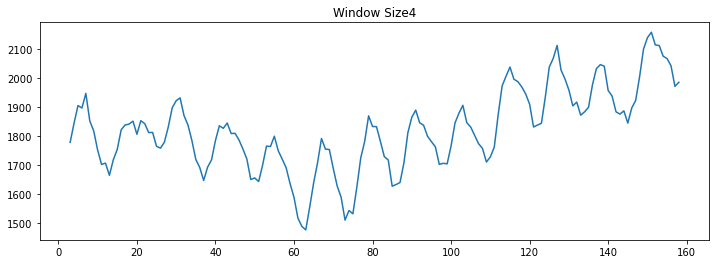

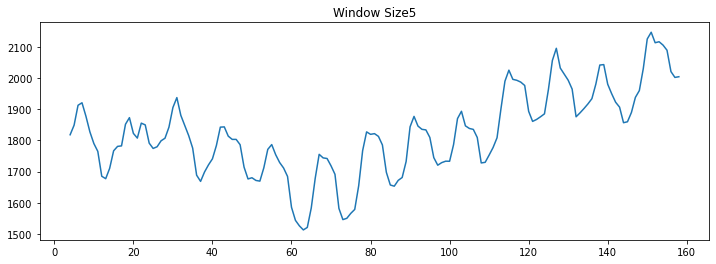

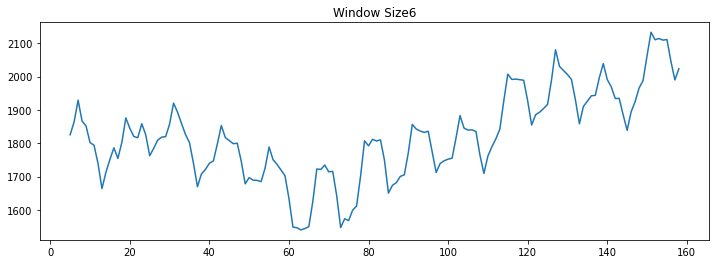

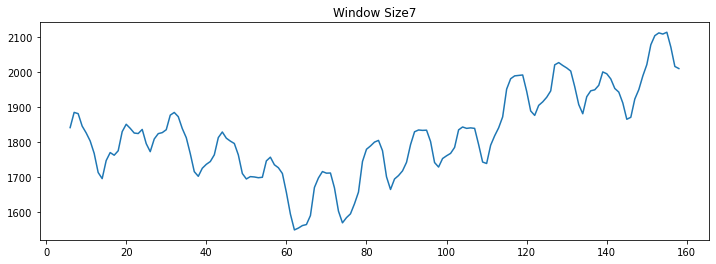

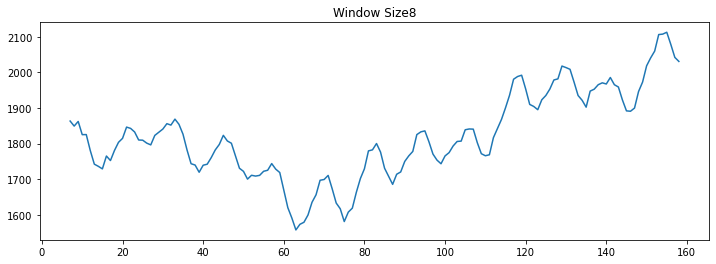

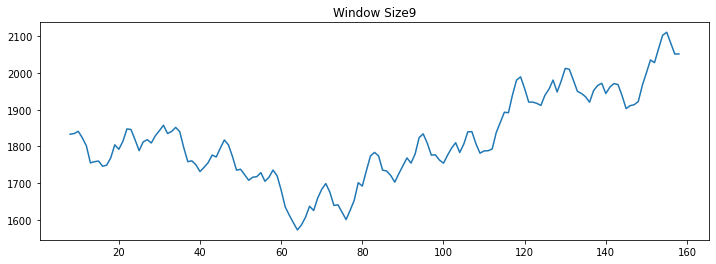

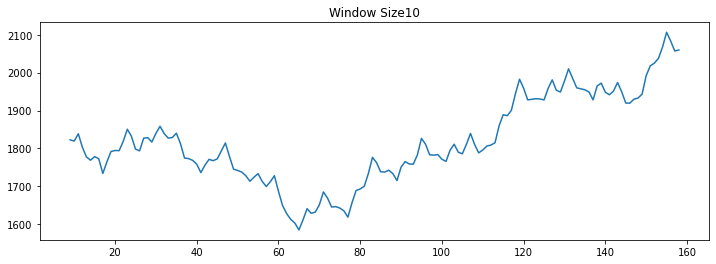

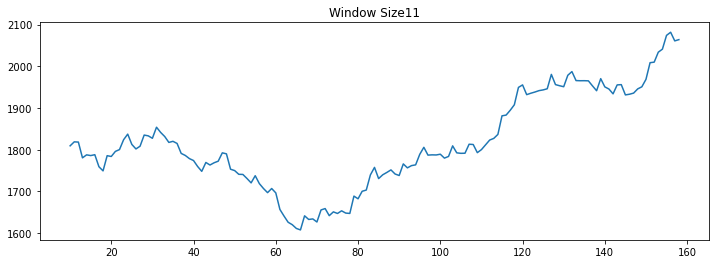

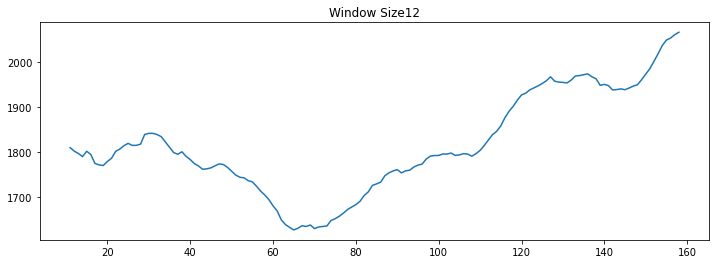

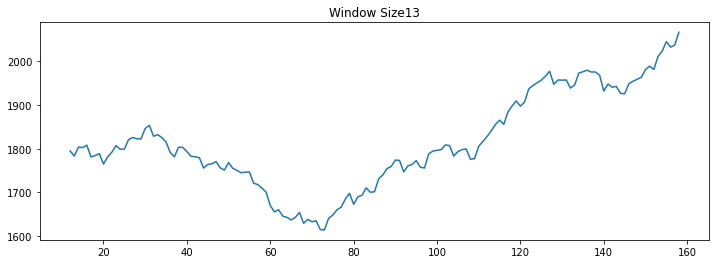

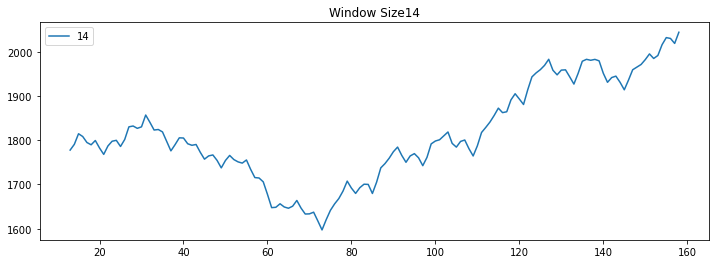

In [28]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
for i in range(1,15):
    plt.figure(figsize=(12,4))
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
    plt.title("Window Size"+str(i),)
plt.legend(loc='best')

# Time series decomposition plot 


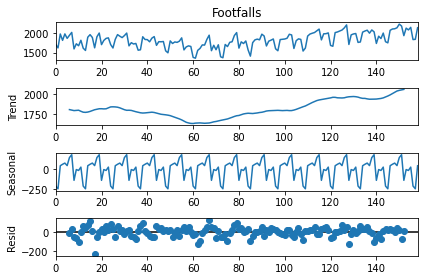

In [29]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


C:\Users\DEEPIKA SHERAWAT\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


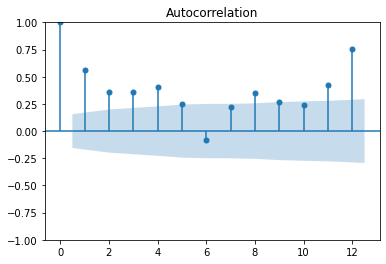

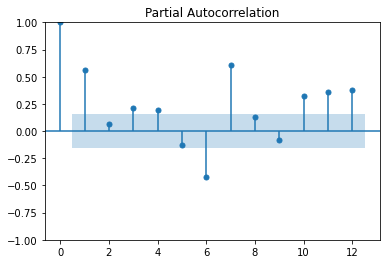

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [31]:
def MAPE(pred,org):        #mean average %error actual-predicted/actual
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [32]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 


8.490637057828362

In [38]:
pred_ses

147    1913.677017
148    1913.677017
149    1913.677017
150    1913.677017
151    1913.677017
152    1913.677017
153    1913.677017
154    1913.677017
155    1913.677017
156    1913.677017
157    1913.677017
158    1913.677017
dtype: float64

### Holt method 

In [33]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

C:\Users\DEEPIK~1\AppData\Local\Temp/ipykernel_13780/1714323129.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


7.546249229496066

In [40]:
pred_hw

147    2021.566977
148    2044.942083
149    2068.317189
150    2091.692296
151    2115.067402
152    2138.442509
153    2161.817615
154    2185.192721
155    2208.567828
156    2231.942934
157    2255.318040
158    2278.693147
dtype: float64

### Holts winter exponential smoothing with additive seasonality and additive trend


In [41]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

2.0083954068872694

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [42]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

2.9678498441563517

## Final Model by combining train and test

In [43]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [44]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2153.270022
160    2180.806271
161    2155.360593
162    2244.062090
163    2274.339502
164    1965.419562
165    2125.253616
166    2106.353304
167    2152.544112
168    1903.654840
dtype: float64